<a href="https://colab.research.google.com/github/Jeevan008/E-Commerce-Domain-Project/blob/main/Ecom_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [58]:
df=pd.read_csv('E-com_Data.csv')
df.head()
df_copy = df.copy()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [60]:
df.shape

(541116, 12)

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,404189.0,2181.909035,1252.681881,2.0,1207.0,2078.0,3291.0,4372.0
InvoieNo,537979.0,385017.572063,13426.052649,361429.0,372961.0,385706.0,396873.0,406651.0
Quantity,537979.0,9.343339,27.623322,-2003.0,1.0,3.0,10.0,3186.0
price per Unit,537979.0,378.339062,440.048823,1.0,169.0,261.0,456.0,64973.0
Price,537979.0,2161.414593,4538.487177,-10152.0,451.0,1194.0,2232.0,90400.0
Sold as set,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [63]:
drop_columns = ['Item Code','Quantity','Time','price per Unit','Shipping Location','Cancelled_status','Reason of return','Sold as set']
df.drop(drop_columns,inplace=True, axis=1)

In [64]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [65]:
df.duplicated().sum()

np.int64(6008)

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
df.isnull().sum()

,0
CustomerID,132249
InvoieNo,1
Date of purchase,1
Price,1


In [69]:
def missing_values(df):
  missing_number = df.isnull().sum().sort_values(ascending=False)
  missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
  return missing_values
missing_values(df)

,Missing_Number,Missing_Percent
CustomerID,132249,0.247145
InvoieNo,1,0.000002
Date of purchase,1,0.000002
Price,1,0.000002


In [70]:
df=df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402859 entries, 0 to 537949
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        402859 non-null  float64
 1   InvoieNo          402859 non-null  float64
 2   Date of purchase  402859 non-null  object 
 3   Price             402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [71]:
(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

,0
CustomerID,0.0
InvoieNo,0.0
Date of purchase,0.0
Price,0.0


In [72]:
df=df.rename(columns={'InvoieNo':"InvoiceNo", "Date of purchase":"Date"})

In [73]:
df.columns

Index(['CustomerID', 'InvoiceNo', 'Date', 'Price'], dtype='object')

In [74]:
df['CustomerID'].nunique()


4349

In [75]:
df['Date'].describe().T

,Date
count,402859
unique,381
top,24-11-2017
freq,2507


In [76]:
new_date= datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

In [77]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
RFMApproach = df.groupby('CustomerID').agg({'Date': lambda x: (new_date - x.max()).days,
                                            'InvoiceNo': lambda x:x.count(),
                                            'Price': lambda x: x.sum()})
RFMApproach.rename(columns={'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetary'},inplace=True)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,751,279720.0


In [78]:
RFMApproach.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4349.0,93.299379,100.701315,1.0,18.0,51.0,144.0,381.0
Frequency,4349.0,92.632559,230.742279,1.0,17.0,42.0,101.0,7919.0
Monetary,4349.0,229493.932881,855668.518674,-50372.0,38140.0,83635.0,205444.0,35472089.0


In [79]:
quantiles = RFMApproach.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [80]:
def Recency_value(x,p,d):
  if x<=d[p][0.25]:
    return 1
  elif x <= d[p][0.50]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

In [81]:
def Freq_Mont_value(x,p,d):
  if x<= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [82]:
RFMApproach['R'] = RFMApproach['Recency'].apply(Recency_value, args=('Recency',quantiles))
RFMApproach['F'] = RFMApproach['Frequency'].apply(Freq_Mont_value, args=('Frequency',quantiles))
RFMApproach['M'] = RFMApproach['Monetary'].apply(Freq_Mont_value, args=('Monetary',quantiles))

In [83]:
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [84]:
RFMApproach['RFM']=RFMApproach[['R','F','M']].sum(axis=1)
RFMApproach.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,2,2,2,6
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,9,13,24962.0,1,4,4,9
4347,4371.0,4,751,279720.0,1,1,1,3


In [85]:
RFMApproach['RFM'].value_counts()

,count
RFM,
10,508
3,471
7,461
9,458
8,447
5,439
12,410
6,405
11,380


In [86]:
Loyality_Level=['platinum','gold','silver','bronze']
score_cuts=pd.qcut(RFMApproach.RFM, q=4, labels=Loyality_Level)
RFMApproach['Loyality_Level']=score_cuts.values
RFMApproach

,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
CustomerID,,,,,,,,
2.0,4,181,550416.0,1,1,1,3,platinum
3.0,77,27,257404.0,3,3,1,7,gold
4.0,19,72,176613.0,2,2,2,6,gold
5.0,311,16,41976.0,4,4,3,11,bronze
6.0,37,84,151822.0,2,2,2,6,gold
...,...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4,12,bronze
4369.0,181,7,10774.0,4,4,4,12,bronze
4370.0,9,13,24962.0,1,4,4,9,silver


In [87]:
RFMApproach=RFMApproach.reset_index()
RFMApproach.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_Level
0,2.0,4,181,550416.0,1,1,1,3,platinum
1,3.0,77,27,257404.0,3,3,1,7,gold
2,4.0,19,72,176613.0,2,2,2,6,gold
3,5.0,311,16,41976.0,4,4,3,11,bronze
4,6.0,37,84,151822.0,2,2,2,6,gold


In [88]:
RFMApproach['Loyality_Level'].value_counts()

,count
Loyality_Level,
gold,1313
platinum,1280
silver,966
bronze,790


In [89]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [90]:
final_report=RFMApproach.groupby('Loyality_Level')[['Recency','Frequency','Monetary','CustomerID']].agg({'Recency':'sum',
                                                                                                       'Frequency':'sum',
                                                                                                       'Monetary':'sum',
                                                                                                       'CustomerID':'nunique'}).reset_index()

In [91]:
final_report= final_report.rename(columns={'CustomerID':'NumBuyers'})
final_report

,Loyality_Level,Recency,Frequency,Monetary,NumBuyers
0,platinum,25971,294629,763311232.0,1280
1,gold,84142,75914,165998506.0,1313
2,silver,121714,23728,50215730.1,966
3,bronze,173932,8588,18543646.0,790


In [92]:
final_report['percent'] = round(final_report['NumBuyers']/final_report.NumBuyers.sum()*100,2)

In [93]:
final_report

,Loyality_Level,Recency,Frequency,Monetary,NumBuyers,percent
0,platinum,25971,294629,763311232.0,1280,29.43
1,gold,84142,75914,165998506.0,1313,30.19
2,silver,121714,23728,50215730.1,966,22.21
3,bronze,173932,8588,18543646.0,790,18.17


In [94]:
final_report1=final_report[['Loyality_Level','NumBuyers','percent']]
final_report1

,Loyality_Level,NumBuyers,percent
0,platinum,1280,29.43
1,gold,1313,30.19
2,silver,966,22.21
3,bronze,790,18.17


In [95]:
!pip install squarify
import squarify

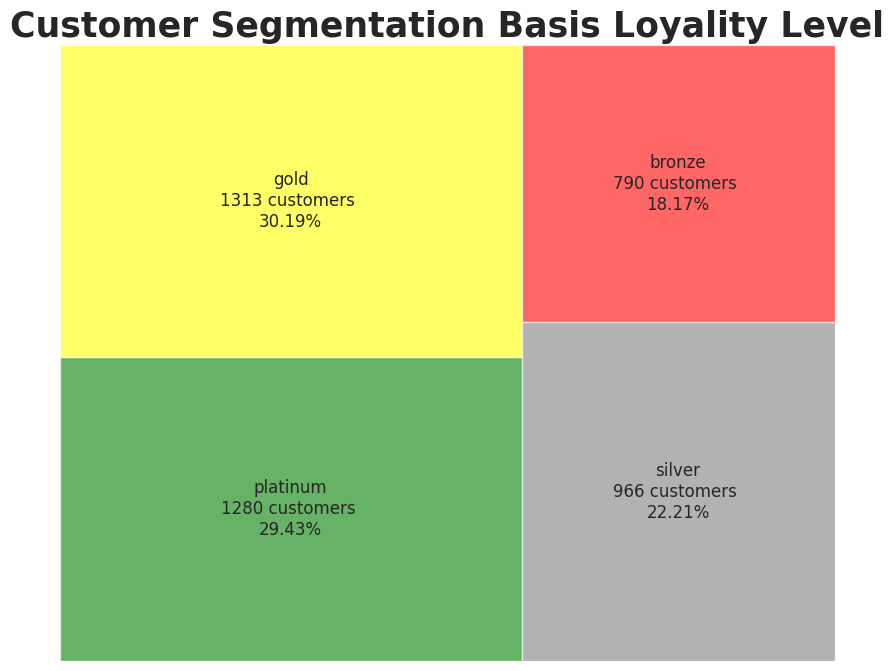

In [96]:
fig = plt.gcf()
ax = fig.add_subplot
fig.set_size_inches(10,8)
colors_dics = {'platinum':'green','gold' : 'yellow', 'silver' : 'gray', 'bronze': 'red'}
squarify.plot(sizes=final_report1['NumBuyers'], color = colors_dics.values(),
              label = ['{}\n{:0.0f} customers \n{}%'.format(*final_report1.iloc[i])for i in range(0,len(final_report1))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyality Level", fontsize=25, fontweight="bold")
plt.axis('off')
plt.show()

UnSupervised ML - Segmentation/Clustering/Grouping

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.cluster.hierarchy as sch
from datetime import datetime

In [98]:
RFMApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM',
       'Loyality_Level'],
      dtype='object')

In [99]:
df = RFMApproach[['Recency','Frequency','Monetary']]
df.head()

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0


In [100]:
#Standardization
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df)
rfm_scaled

array([[-0.88687668,  0.38301434,  0.37509732],
       [-0.16187726, -0.28447368,  0.0326216 ],
       [-0.73790419, -0.08942848, -0.06180783],
       ...,
       [-0.83721918, -0.34515441, -0.23905922],
       [-0.88687668,  2.85358691,  0.05870479],
       [-0.48961672, -0.10676583,  0.0320933 ]])

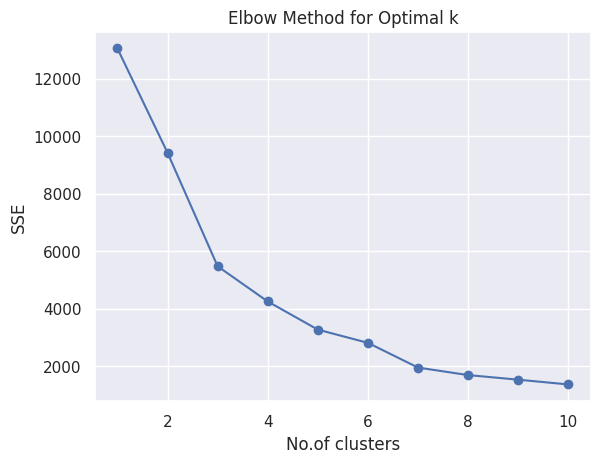

In [101]:
#Customer Segmentation using KMeans
#Finding optimal clusters using Elbow method

sse=[]
for k in range(1,11):
  kmeans= KMeans(n_clusters=k,random_state=42)
  kmeans.fit(rfm_scaled)
  sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse,marker='o')
plt.xlabel('No.of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()


In [102]:
kmeans= KMeans(n_clusters=5,random_state=42)
df['Kmeans cluster'] = kmeans.fit_predict(rfm_scaled)
df.head()

,Recency,Frequency,Monetary,Kmeans cluster
0,4,181,550416.0,0
1,77,27,257404.0,0
2,19,72,176613.0,0
3,311,16,41976.0,1
4,37,84,151822.0,0


In [103]:
df['Kmeans cluster'].value_counts()

,count
Kmeans cluster,
0,2920
1,1063
4,351
3,11
2,4


#Hierarchical Clustering

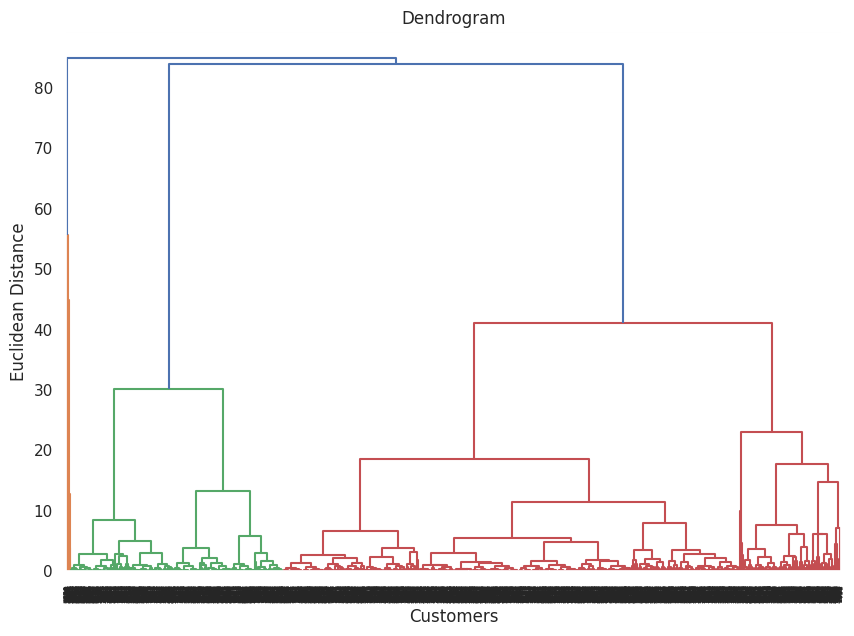

In [104]:
linked =linkage(rfm_scaled,method = 'ward')
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')
plt.xlabel('Customers')
plt.show()

In [105]:
df['Hierarchical Cluster'] = fcluster(linked,6,criterion='maxclust')
df.head()

,Recency,Frequency,Monetary,Kmeans cluster,Hierarchical Cluster
0,4,181,550416.0,0,6
1,77,27,257404.0,0,5
2,19,72,176613.0,0,5
3,311,16,41976.0,1,4
4,37,84,151822.0,0,5


#DBSCAN

In [106]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_scaled)
df.head()

,Recency,Frequency,Monetary,Kmeans cluster,Hierarchical Cluster,DBSCAN_Cluster
0,4,181,550416.0,0,6,0
1,77,27,257404.0,0,5,0
2,19,72,176613.0,0,5,0
3,311,16,41976.0,1,4,0
4,37,84,151822.0,0,5,0


In [107]:
df['DBSCAN_Cluster'].value_counts()

,count
DBSCAN_Cluster,
0,4330
-1,19


#Cohort Analysis for Customer Retention

In [108]:
df.head()

,Recency,Frequency,Monetary,Kmeans cluster,Hierarchical Cluster,DBSCAN_Cluster
0,4,181,550416.0,0,6,0
1,77,27,257404.0,0,5,0
2,19,72,176613.0,0,5,0
3,311,16,41976.0,1,4,0
4,37,84,151822.0,0,5,0


In [109]:
df_copy.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


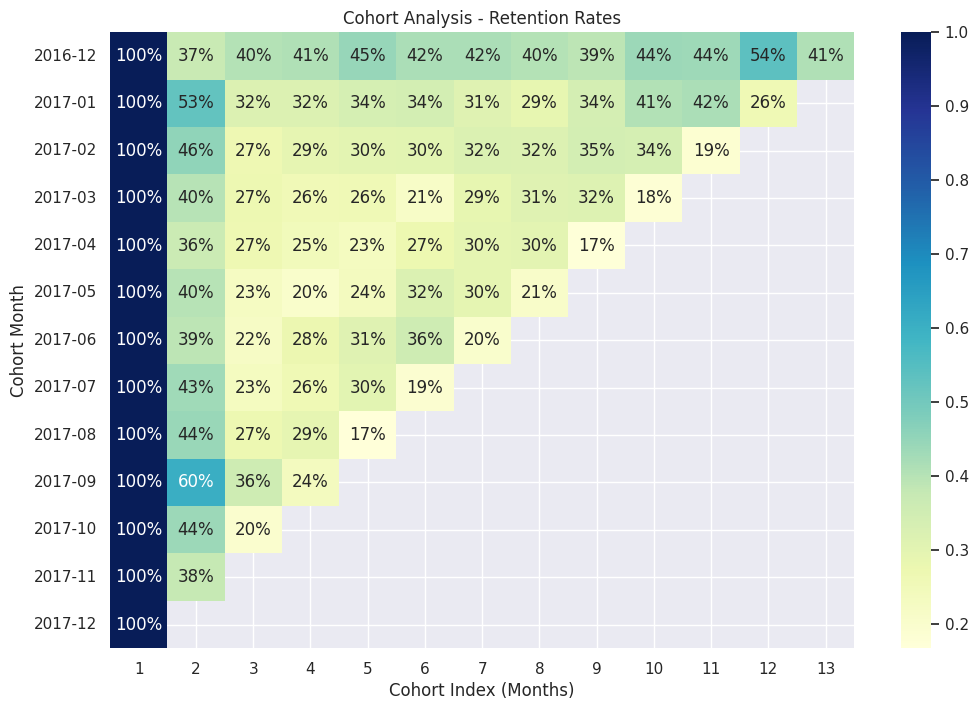

In [110]:
df_copy['Date'] = pd.to_datetime(df_copy['Date of purchase'])
df_copy['Month'] = df_copy['Date'].dt.to_period('M')
df_copy['CohortMonth'] = df_copy.groupby('CustomerID')['Date'].transform('min').dt.to_period('M')

def cohort_index(df_copy):
    year_diff = df_copy['Month'].dt.year - df_copy['CohortMonth'].dt.year
    month_diff = df_copy['Month'].dt.month - df_copy['CohortMonth'].dt.month
    return year_diff * 12 + month_diff + 1

df_copy['CohortIndex'] = cohort_index(df_copy)

cohort_data = df_copy.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Retention Rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Cohort Analysis - Retention Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index (Months)')
plt.show()